---
Key Notes

---

> Open Price:

1. The "open" price refers to the price of a financial instrument (such as a stock) at the beginning of a specified trading period, such as a day or a session.
2. It is the price at which the first trade occurs when the market opens for that period.

---

> Close Price:

1. The "close" price is the last traded price of a financial instrument at the end of a specified trading period.
2. It represents the final price at which a trade occurs before the market closes for that period.

---
    
> High Price:

1. The "high" price is the highest traded price of a financial instrument during a specified trading period.
2. It provides information about the highest level the price reached within that period.

---

> Low Price:

1. The "low" price is the lowest traded price of a financial instrument during a specified trading period.
2. It indicates the lowest level the price reached within that period.

---

> Volume:

1. Volume refers to the total number of shares or contracts traded during a specific time period.
2. It represents the level of market activity and liquidity.
---

> Adjusted Close Price:

1. The "adjusted close" price accounts for corporate actions like stock splits and dividend payments.
2. It provides a more accurate representation of the stock's value over time, considering events that may impact its price.
---
> Returns:

1. Returns represent the percentage change in the price of a financial instrument over a specific period.
2. It is often calculated as the percentage difference between the closing prices on different days.
3. These variables are fundamental components of stock price data and are used in various financial analyses and technical indicators to understand market trends, volatility, and potential investment opportunities. Traders and investors often analyze these variables collectively to make informed decisions about buying, selling, or holding financial instruments.

---
Importing Libraries

---


In [5]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import ta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader._utils import RemoteDataError

---
Function: cleaning columns

---

In [21]:
def cleanColumnNames(df):
  #remove trailing and leading spaces
  df=df.rename(columns=lambda x :  x.strip())

  #remove extra spaces 
  df.columns = df.columns.str.replace('  ',' ')

  #replace space with underscore
  df.columns=df.columns.str.replace(' ','_')

  #lowercase the column names
  df = df.rename(columns=lambda x: x.lower())
  
  return df

---
Define Start and End date 

---

In [6]:
# Start date
start_date = datetime(2023, 1, 1)
# End date
end_date = datetime(2023, 12, 31)

---
Download stock data of 5 companies

---


In [8]:

# Our stock - NVDA
nvda_df = yf.download("NVDA", start_date, end_date)

# Competitor stocks
# AMD
amd_df = yf.download("AMD", start_date, end_date)
# Taiwan Semiconductor Mfg. Co
tsm_df = yf.download("TSM", start_date, end_date)
# Qualcomm
qcom_df = yf.download("QCOM", start_date, end_date)
# Broadcom
avgo_dm = yf.download("AVGO", start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


---
Reading Columns/Features

---

In [11]:
nvda_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

---

Picking up the required Features

---


In [14]:
nvda_new_df = nvda_df[["Open", "Close", "Adj Close", "Volume"]]
amd_new_df = amd_df[["Open", "Close", "Adj Close", "Volume"]]
tsm_new_df = tsm_df[["Open", "Close", "Adj Close", "Volume"]]
qcom_new_df = qcom_df[["Open", "Close", "Adj Close", "Volume"]]
avgo_new_dm = avgo_dm[["Open", "Close", "Adj Close", "Volume"]]

---
Renaming the features corresponding to each stock

---

In [15]:
cols = list(nvda_df.columns)
for col in cols:
    nvda_new_df.rename(columns={col: "NVDA_" + col}, inplace=True)
    amd_new_df.rename(columns={col: "AMD_" + col}, inplace=True)
    tsm_new_df.rename(columns={col: "TSM_" + col}, inplace=True)
    qcom_new_df.rename(columns={col: "QCOM_" + col}, inplace=True)
    avgo_new_dm.rename(columns={col: "AVGO_" + col}, inplace=True)

/var/folders/c9/wytgs3g14698n1_9r5l9959c0000gn/T/ipykernel_1896/1061199724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_new_df.rename(columns={col: "NVDA_" + col}, inplace=True)
/var/folders/c9/wytgs3g14698n1_9r5l9959c0000gn/T/ipykernel_1896/1061199724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amd_new_df.rename(columns={col: "AMD_" + col}, inplace=True)
/var/folders/c9/wytgs3g14698n1_9r5l9959c0000gn/T/ipykernel_1896/1061199724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

---
Concatenating all the dataframes to provide a final dataframe

---

In [44]:
final_df = pd.concat([nvda_new_df,amd_new_df,tsm_new_df,qcom_new_df,avgo_new_dm], axis=1)
final_df = cleanColumnNames(final_df)
final_df.head()

,nvda_open,nvda_close,nvda_adj_close,nvda_volume,amd_open,amd_close,amd_adj_close,amd_volume,tsm_open,tsm_close,tsm_adj_close,tsm_volume,qcom_open,qcom_close,qcom_adj_close,qcom_volume,avgo_open,avgo_close,avgo_adj_close,avgo_volume
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03,148.509995,143.149994,143.086502,40127700,66.000000,64.019997,64.019997,46851800,75.849998,74.029999,72.960762,9276200,111.349998,107.199997,104.406326,8110400,565.000000,553.479980,543.651733,2017300
2023-01-04,145.669998,147.490005,147.424606,43132400,65.000000,64.660004,64.660004,47477100,74.989998,76.320000,75.217690,12316400,109.800003,111.529999,108.623489,7614200,562.989990,560.239990,550.291748,1707400
2023-01-05,144.910004,142.649994,142.586731,38916800,64.150002,62.330002,62.330002,46159500,76.000000,75.730003,74.636223,10039200,109.930000,109.400002,106.548988,7546000,555.710022,555.020020,545.164429,1627700
2023-01-06,144.740005,148.589996,148.524094,40504400,63.150002,63.959999,63.959999,70161300,76.500000,78.070000,76.942413,13744100,110.959999,115.339996,112.334198,10259300,563.119995,588.429993,577.981140,3526100
2023-01-09,152.839996,156.279999,156.210678,50423100,66.220001,67.239998,67.239998,69741300,80.559998,80.309998,79.150063,22247600,116.730003,114.610001,111.623222,10291800,592.299988,576.890015,566.646057,3773900


---
EDA : Exploratory Data Analysis

---

1. Feature Information

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2023-01-03 to 2023-12-14
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nvda_open       240 non-null    float64
 1   nvda_close      240 non-null    float64
 2   nvda_adj_close  240 non-null    float64
 3   nvda_volume     240 non-null    int64  
 4   amd_open        240 non-null    float64
 5   amd_close       240 non-null    float64
 6   amd_adj_close   240 non-null    float64
 7   amd_volume      240 non-null    int64  
 8   tsm_open        240 non-null    float64
 9   tsm_close       240 non-null    float64
 10  tsm_adj_close   240 non-null    float64
 11  tsm_volume      240 non-null    int64  
 12  qcom_open       240 non-null    float64
 13  qcom_close      240 non-null    float64
 14  qcom_adj_close  240 non-null    float64
 15  qcom_volume     240 non-null    int64  
 16  avgo_open       240 non-null    float64
 17  avgo_close      

2. Null Count Analysis

In [46]:
null_counts = final_df.isna().sum()

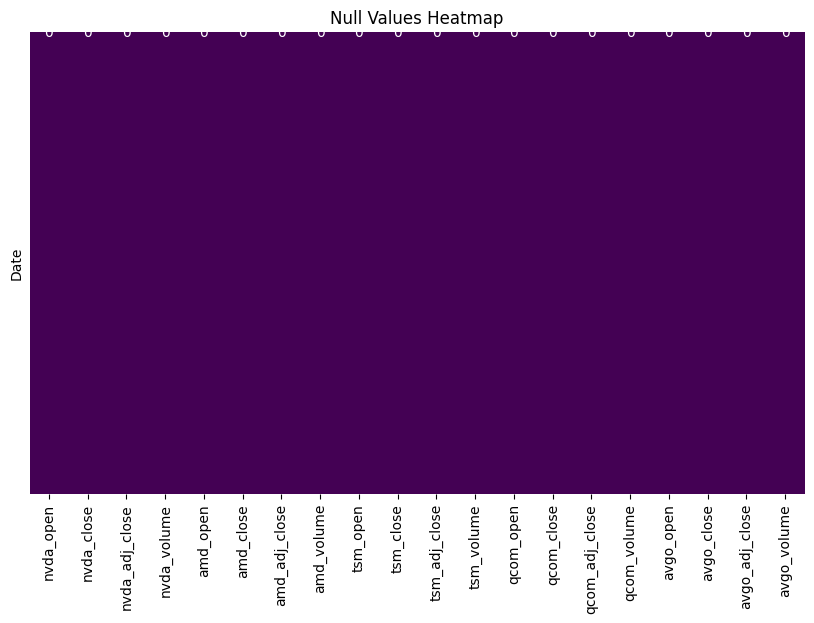

In [47]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Display null counts above the heatmap
for i, value in enumerate(null_counts):
    plt.text(i + 0.5, 0.5, f'{value}', color='white', ha='center', va='center')

plt.title('Null Values Heatmap')
plt.show()

---
3. Time Series Analysis of Close Values: A Comparative Study for AMD, NVDA, TSM, QCOM, and AVGO

---

In [48]:
final_df.count()

nvda_open         240
nvda_close        240
nvda_adj_close    240
nvda_volume       240
amd_open          240
amd_close         240
amd_adj_close     240
amd_volume        240
tsm_open          240
tsm_close         240
tsm_adj_close     240
tsm_volume        240
qcom_open         240
qcom_close        240
qcom_adj_close    240
qcom_volume       240
avgo_open         240
avgo_close        240
avgo_adj_close    240
avgo_volume       240
dtype: int64

In [50]:
# Extract relevant columns for close values
close_columns = ['nvda_close', 'amd_close', 'tsm_close', 'qcom_close', 'avgo_close']
close_df = final_df[close_columns]


In [51]:
close_df

,nvda_close,amd_close,tsm_close,qcom_close,avgo_close
Date,,,,,
2023-01-03,143.149994,64.019997,74.029999,107.199997,553.479980
2023-01-04,147.490005,64.660004,76.320000,111.529999,560.239990
2023-01-05,142.649994,62.330002,75.730003,109.400002,555.020020
2023-01-06,148.589996,63.959999,78.070000,115.339996,588.429993
2023-01-09,156.279999,67.239998,80.309998,114.610001,576.890015
...,...,...,...,...,...
2023-12-08,475.059998,128.919998,100.349998,132.970001,944.299988
2023-12-11,466.269989,134.410004,100.949997,136.100006,1029.239990
2023-12-12,476.570007,137.610001,101.599998,136.679993,1072.280029


In [54]:
# Convert the index to datetime if it's not already
final_df.index = pd.to_datetime(final_df.index)

# Extract the min and max dates for the 'close_df' column
min_date = final_df.index.min()
max_date = final_df.index.max()

print(f"Minimum Date for close_df: {min_date}")
print(f"Maximum Date for close_df: {max_date}")

Minimum Date for close_df: 2023-01-03 00:00:00
Maximum Date for close_df: 2023-12-14 00:00:00


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is your DataFrame
# Extract relevant columns for close values
close_columns = ['nvda_close', 'amd_close', 'tsm_close', 'qcom_close', 'avgo_close']

# Convert the index to datetime if it's not already
final_df.index = pd.to_datetime(final_df.index)


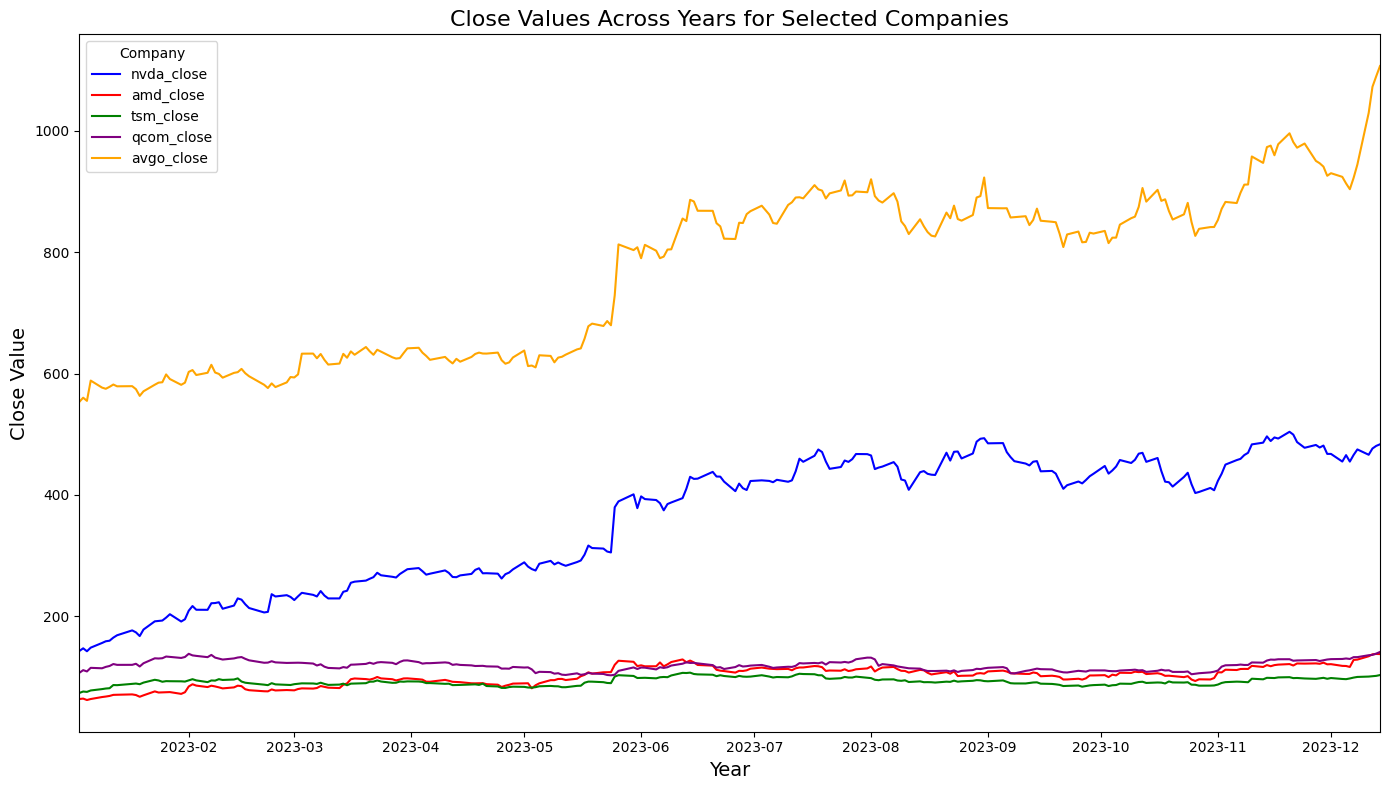

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is your DataFrame
# Extract relevant columns for close values
close_columns = ['nvda_close', 'amd_close', 'tsm_close', 'qcom_close', 'avgo_close']

# Convert the index to datetime if it's not already
final_df.index = pd.to_datetime(final_df.index)

# Melt the DataFrame for easier plotting
melted_df = final_df[close_columns].reset_index().melt(id_vars='Date', var_name='Company', value_name='Close Value')

# Create a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_df, x='Date', y='Close Value', hue='Company', palette={'amd_close': 'red', 'nvda_close': 'blue', 'tsm_close': 'green', 'qcom_close': 'purple', 'avgo_close': 'orange'})

# Set x-axis limits to reduce length
plt.xlim(melted_df['Date'].min(), melted_df['Date'].max())  # Adjust as needed

# Improve plot figure
plt.title('Close Values Across Years for Selected Companies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Value', fontsize=14)
plt.legend(title='Company', loc='upper left')
plt.tight_layout()

plt.show()


---
4. Line Plot - Close Values Across Companies

---

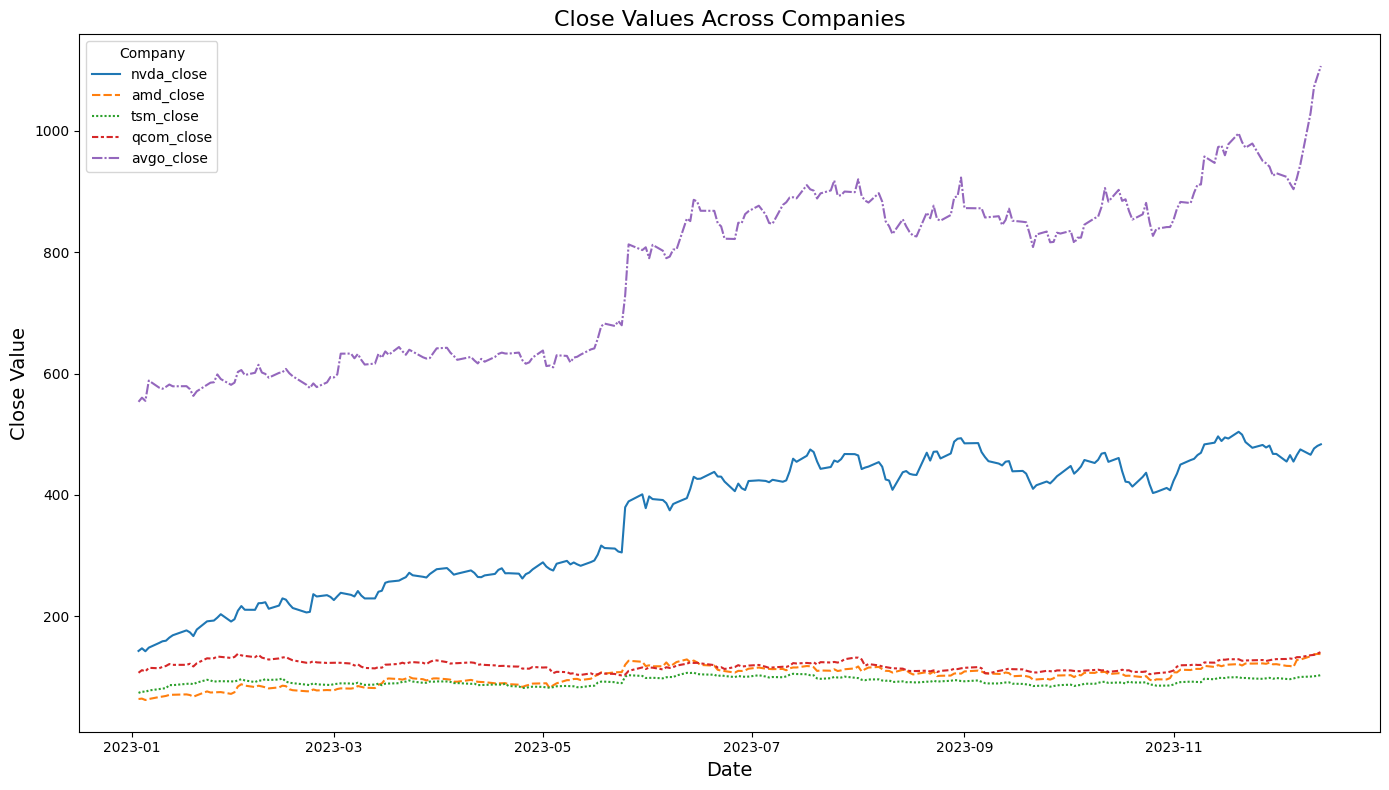

In [56]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=final_df[close_columns])
plt.title('Close Values Across Companies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Value', fontsize=14)
plt.legend(title='Company', loc='upper left')
plt.tight_layout()
plt.show()

---
5. Histograms - Distribution of Close Values for Each Company

---

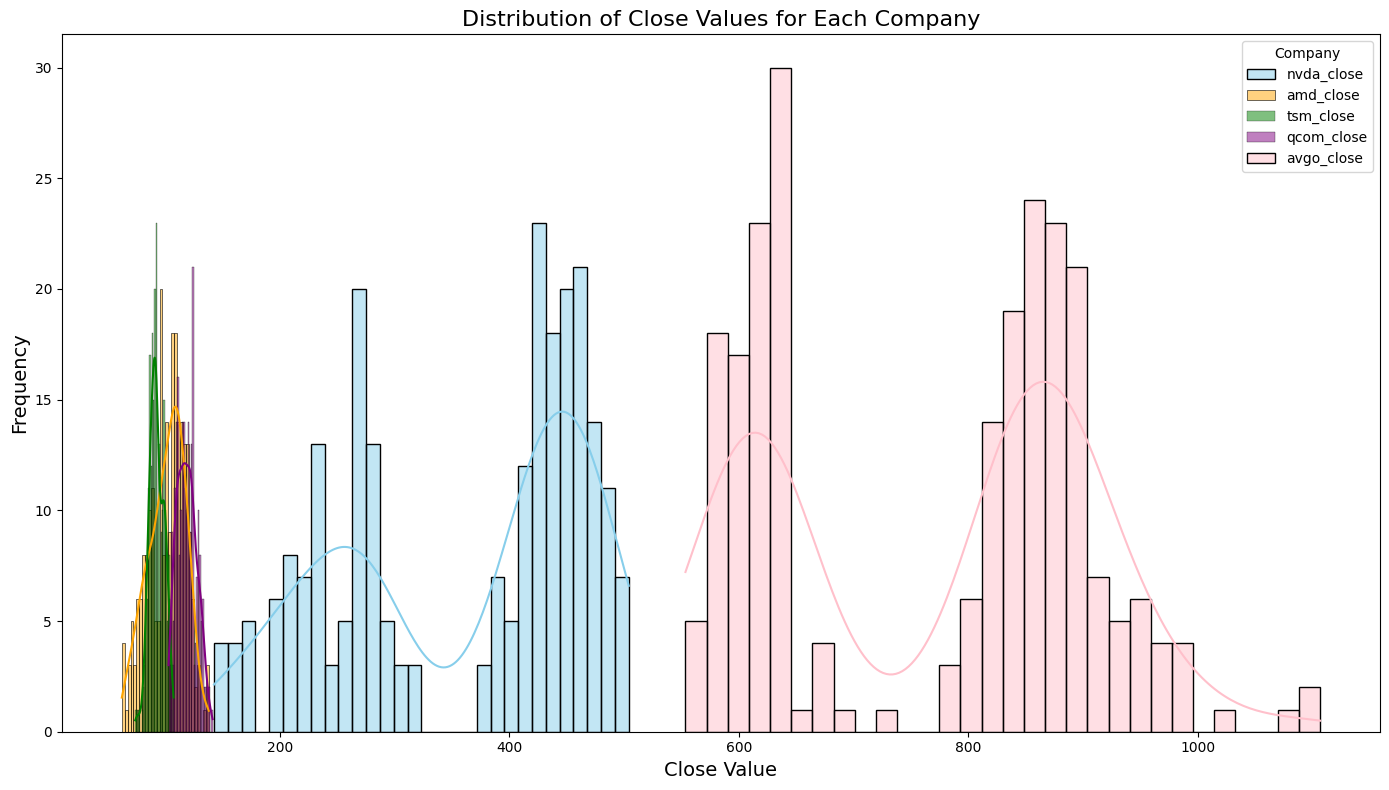

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is your DataFrame
# Extract relevant columns for 'close' values
close_columns = ['nvda_close', 'amd_close', 'tsm_close', 'qcom_close', 'avgo_close']

# Set distinct color codes for each company
color_dict = {'nvda_close': 'skyblue', 'amd_close': 'orange', 'tsm_close': 'green', 'qcom_close': 'purple', 'avgo_close': 'pink'}

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot histograms for each company with distinct color codes
for column in close_columns:
    sns.histplot(final_df[column], bins=30, kde=True, label=column, alpha=0.5, color=color_dict[column])

# Customize plot details
plt.title('Distribution of Close Values for Each Company', fontsize=16)
plt.xlabel('Close Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Company', loc='upper right')
plt.tight_layout()

plt.show()


---
6. Box Plot - For each company

---

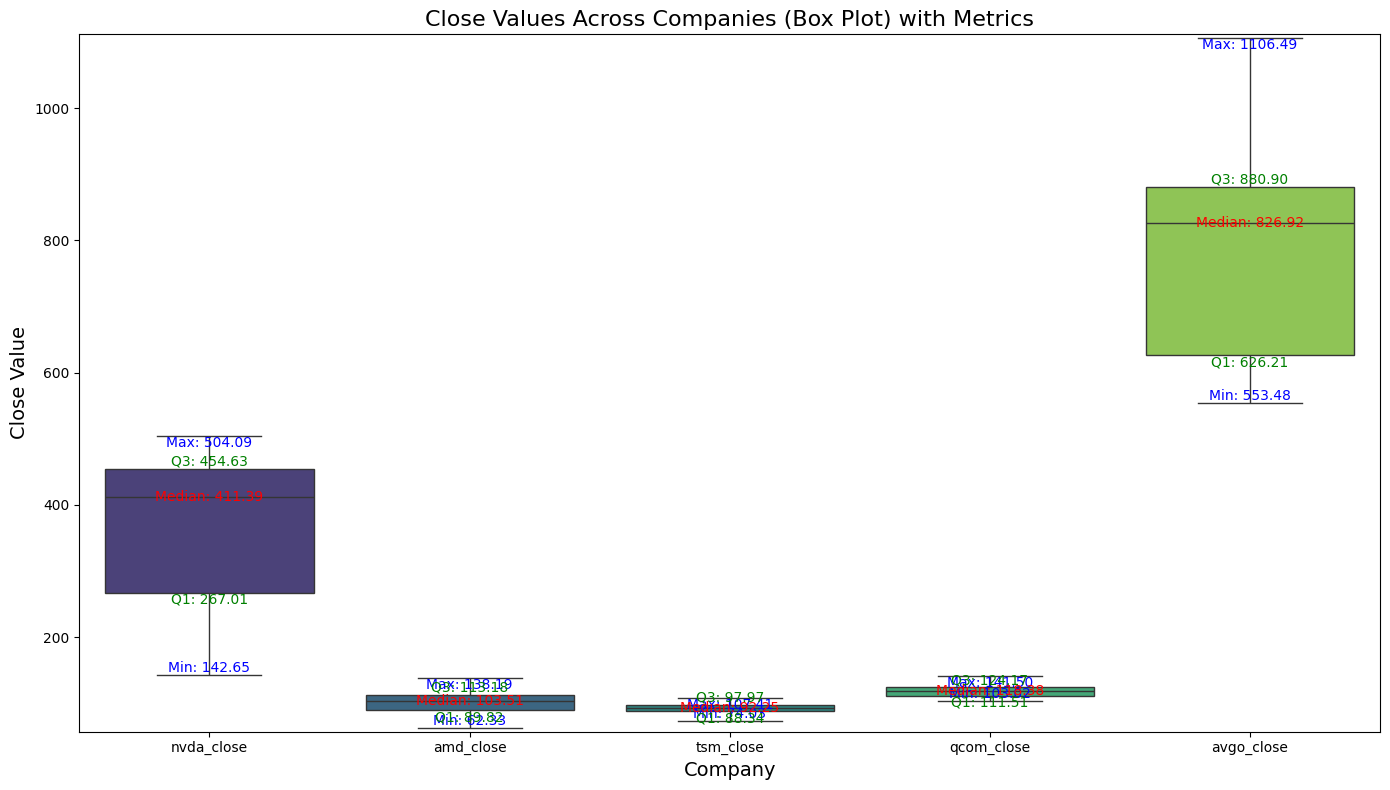

In [67]:
# Assuming final_df is your DataFrame
# Extract relevant columns for 'close' values
close_columns = ['nvda_close', 'amd_close', 'tsm_close', 'qcom_close', 'avgo_close']

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot box plots for each company
sns.boxplot(data=final_df[close_columns], palette='viridis')

# Add annotations for min, max, and other metrics
for i, column in enumerate(close_columns):
    values = final_df[column]
    median = values.median()
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    lower_whisker = values[values >= q1 - 1.5 * (q3 - q1)].min()
    upper_whisker = values[values <= q3 + 1.5 * (q3 - q1)].max()

    # Annotate on the plot
    ax.text(i, lower_whisker, f'Min: {lower_whisker:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i, upper_whisker, f'Max: {upper_whisker:.2f}', ha='center', va='top', fontsize=10, color='blue')
    ax.text(i, median, f'Median: {median:.2f}', ha='center', va='center', fontsize=10, color='red')
    ax.text(i, q3, f'Q3: {q3:.2f}', ha='center', va='bottom', fontsize=10, color='green')
    ax.text(i, q1, f'Q1: {q1:.2f}', ha='center', va='top', fontsize=10, color='green')

# Increase y-axis scale
plt.ylim(bottom=final_df[close_columns].min().min() - 5, top=final_df[close_columns].max().max() + 5)

# Customize plot details
plt.title('Close Values Across Companies (Box Plot) with Metrics', fontsize=16)
plt.ylabel('Close Value', fontsize=14)
plt.xlabel('Company', fontsize=14)
plt.tight_layout()

plt.show()


---
7. Volume data for each company

---

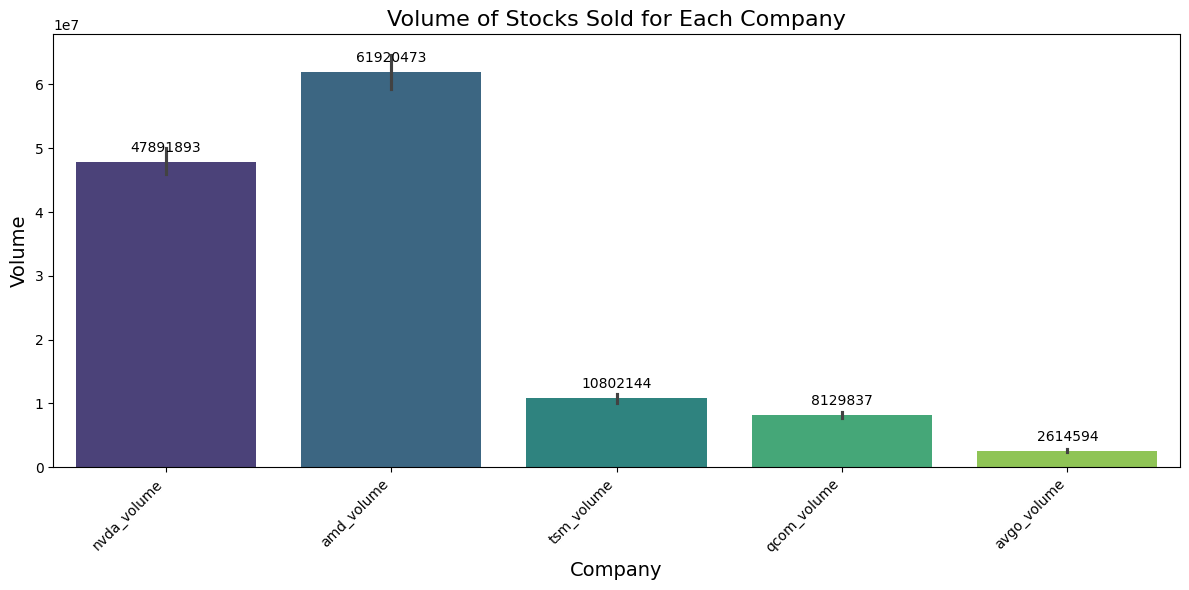

In [70]:
# Assuming final_df is your DataFrame with a 'Volume' column for each company
volume_columns = ['nvda_volume', 'amd_volume', 'tsm_volume', 'qcom_volume', 'avgo_volume']

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the volume data
barplot = sns.barplot(data=final_df[volume_columns], palette='viridis', ax=ax)

# Adding annotations (count values) to the bars
for p in barplot.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Customize plot details
plt.title('Volume of Stocks Sold for Each Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


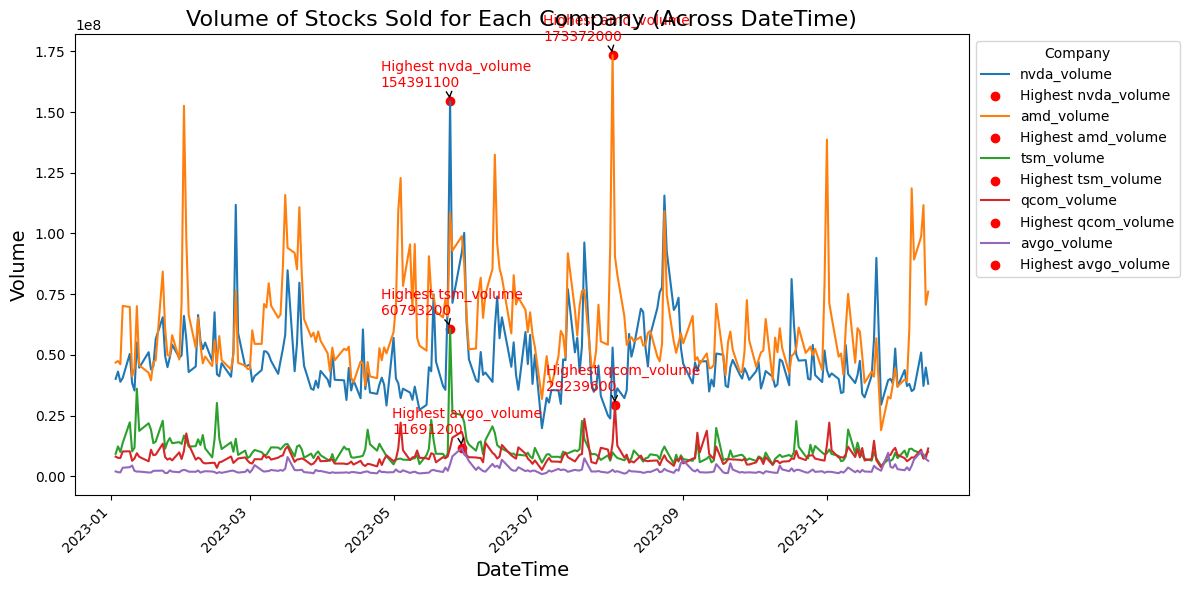

In [74]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the volume data for each company
for column in volume_columns:
    sns.lineplot(x=final_df.index, y=column, data=final_df, label=column)
    # Mark the highest volume point for each company
    max_volume_date = final_df[column].idxmax()
    max_volume = final_df[column].max()
    ax.scatter(max_volume_date, max_volume, color='red', marker='o', label=f'Highest {column}')
    # Add annotation with label near the highest volume point
    ax.annotate(f'Highest {column}\n{max_volume:.0f}', xy=(max_volume_date, max_volume), xytext=(-50, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), color='red')

# Customize plot details
plt.title('Volume of Stocks Sold for Each Company (Across DateTime)', fontsize=16)
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend position
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()